In [1]:
import numpy as np
import pandas as pd
import re
import os 
import glob
import matplotlib.pyplot as plt
import xlrd

In [5]:
print (os.getcwd())

/Users/guge/Downloads/PL 4,5/PL04


In [6]:
path = '/Users/guge/Downloads/PL 4,5/PL04'
files = os.listdir(path)
files_csv = list(filter(lambda x: x[-4:]=='.csv' , files))
files_csv.sort()
files_csv

['PL0401.csv',
 'PL0402.csv',
 'PL0403.csv',
 'PL0404.csv',
 'PL0405.csv',
 'PL0406.csv',
 'PL0407.csv',
 'PL0408.csv',
 'PL0409.csv',
 'PL0410.csv',
 'PL0411.csv',
 'PL0412.csv',
 'PL0413.csv',
 'PL0414.csv',
 'PL0415.csv',
 'PL0416.csv',
 'PL0417.csv',
 'PL0418.csv',
 'PL0419.csv',
 'PL0420.csv',
 'PL0421.csv',
 'PL0422.csv']

In [8]:
PL04 = []  
for filename in files_csv:
    df = pd.read_csv(filename)
    PL04.append(df)

In [10]:
for df in PL04:
    df['Time_sec'] = df['Time_sec']/60
    df.rename(columns={'Time_sec':'Time_min'},inplace = True)
    df['Data_point'] = df.index

In [35]:
for df in PL04:
    group = df.groupby(['Cycle']).count()
    group['Cumu_count'] = group['Data_point'].cumsum()
    cycle = []
    cycle = group['Cumu_count']
    df['Charge'] = ""
    df['Discharge'] = ""
    df['Discharge'][0:cycle[1]] = df['Discharge_Ah'][0:cycle[1]]
    df['Charge'][0:cycle[1]] = df['Charge_Ah'][0:cycle[1]]
    for i in range(1,len(cycle)):
        df['Charge'][cycle[i]:cycle[i+1]] = df['Charge_Ah'][cycle[i]:cycle[i+1]]-df['Charge_Ah'][cycle[i]]
        df['Discharge'][cycle[i]:cycle[i+1]] = df['Discharge_Ah'][cycle[i]:cycle[i+1]]-df['Discharge_Ah'][cycle[i]]
        

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: Settin

In [51]:
max_charge_every_cycle = []
max_discharge_every_cycle = []
for df in PL04:
    group = df.groupby(['Cycle']).count()
    group['Cumu_count'] = group['Data_point'].cumsum()
    cycle = []
    cycle = group['Cumu_count']
    for i in range(1,len(cycle)):
        max_charge_every_cycle.append(max(df['Charge'][cycle[i]:cycle[i+1]]))
        max_discharge_every_cycle.append(max(df['Discharge'][cycle[i]:cycle[i+1]]))   
            

In [60]:
def filter_list(l):
    list_without_L =  [item for item in l if item<1.0] 
    list_degradation = [item for item in list_without_L if item >0.265]
    return list_degradation

In [61]:
a = filter_list(max_charge_every_cycle)

In [54]:
def filter_list2(l):
    list_without_L =  [item for item in l if item<0.3] 
    list_degradation = [item for item in list_without_L if item >0.26]
    return list_degradation

In [55]:
b = filter_list2(max_discharge_every_cycle)

Text(0, 0.5, 'Charge_capacity')

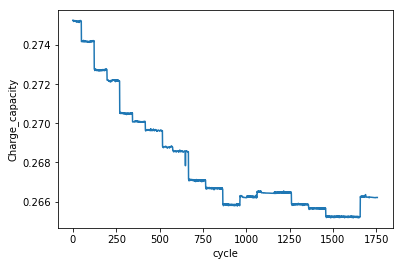

In [62]:
plt.plot(range(0,len(a)),a)
plt.xlabel('cycle')
plt.ylabel('Charge_capacity')

Text(0, 0.5, 'Discharge_capacity')

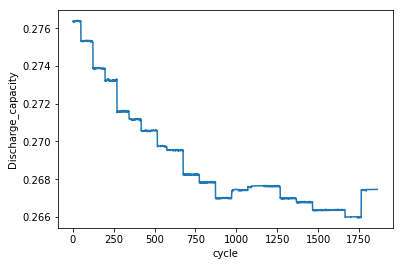

In [57]:
plt.plot(range(0,len(b)),b)
plt.xlabel('cycle')
plt.ylabel('Discharge_capacity')